In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()


In [72]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
file = 'auto.csv'
df = pd.read_csv(file,names = headers)
#pd.set_option("max_columns", None)
pd.set_option("max_rows", None)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [78]:
#dealing with missing values
#changing ? to nan with numpy
df.replace("?", np.nan, inplace = True)
#df.head(120)


In [98]:
#dealing with nans 
avg_normalized_losses = df['normalized-losses'].astype('float').mean(axis=0)
df['normalized-losses'].replace(np.nan, avg_normalized_losses, inplace=True)

#---------------------------------------------------------------------------------------
avg_bore = df['bore'].astype('float').mean(axis=0)
df['bore'].replace(np.nan,avg_bore,inplace = True)
#=--------------------------------------------------------------------------------------
avg_stroke = df['stroke'].astype('float').mean(axis=0)
df['stroke'].replace(np.nan,avg_stroke,inplace = True)
#---------------------------------------------------------------------------------------

avg_horsepower = df['horsepower'].astype('float').mean(axis= 0)
df['horsepower'].replace(np.nan,avg_horsepower,inplace=True)
#-----------------------------------------------------------------------------------------

avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan,avg_peakrpm,inplace=True)
#---------------------------------------------------------------------------------------------
max_numofdoors = df['num-of-doors'].value_counts().idxmax()
df['num-of-doors'].replace(np.nan,max_numofdoors,inplace = True)
#-------------------------------------------------------------------------------------------
df.dropna(subset=["price"], axis=0, inplace=True)


In [94]:
#pg = [df[col].isnull().values.any() for col in df]
for col in df:
    if df[col].isnull().values.any().tolist() == True:
        print(col)
        print (df[col].isnull().value_counts())
        print("")  
        

    

price
False    201
True       4
Name: price, dtype: int64



In [ ]:
df['normalized-losses']

Graph for make: Total = 20


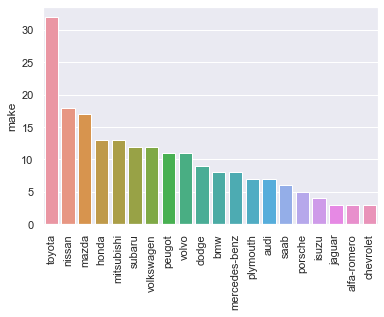

Graph for fuel-type: Total = 2


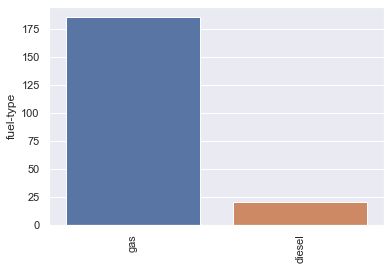

Graph for aspiration: Total = 2


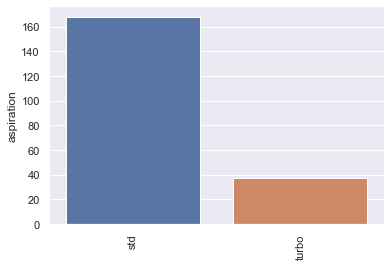

Graph for num-of-doors: Total = 2


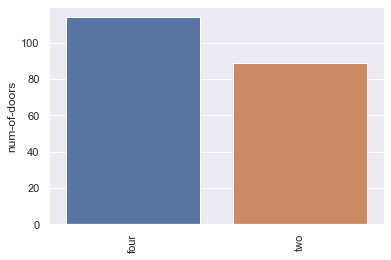

Graph for body-style: Total = 5


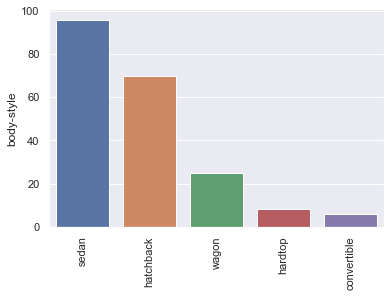

Graph for drive-wheels: Total = 3


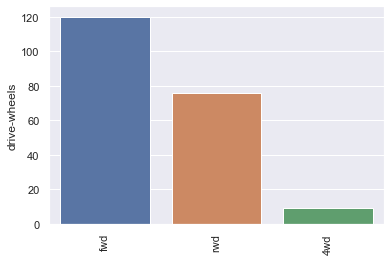

Graph for engine-location: Total = 2


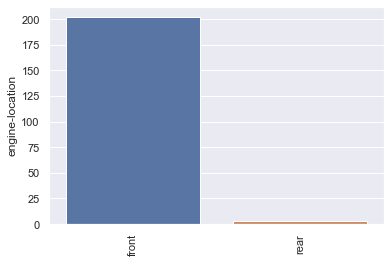

Graph for engine-type: Total = 7


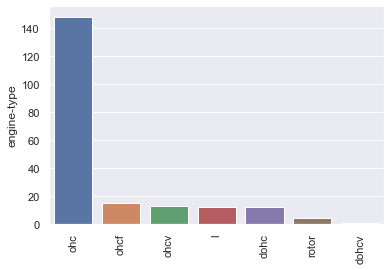

Graph for num-of-cylinders: Total = 7


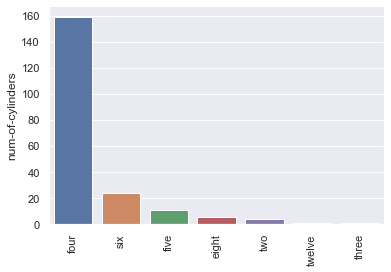

Graph for engine-size: Total = 20


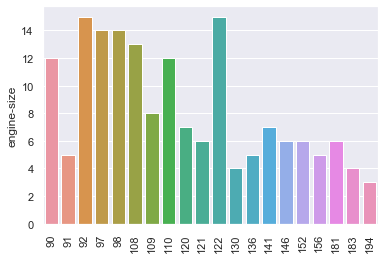

Graph for fuel-system: Total = 8


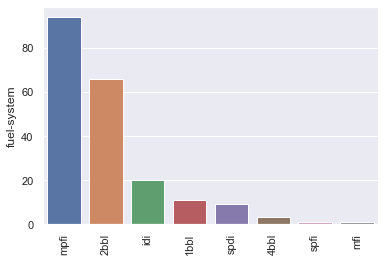

Graph for bore: Total = 20


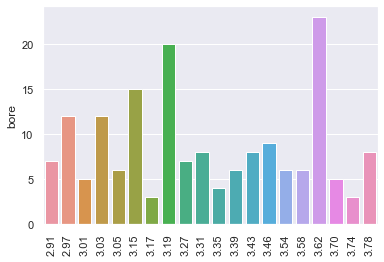

Graph for stroke: Total = 20


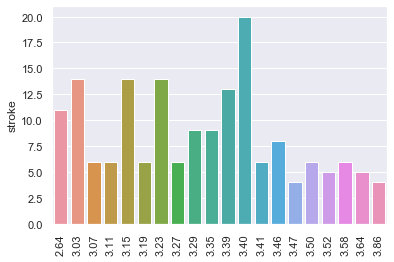

In [10]:
cat = df[["make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke"]]
for i in cat.columns:
    
    cat_num = cat[i].value_counts()
    if len(cat_num) > 20:
        cat_num = cat[i].value_counts()[:20]
    else:
        cat_num = cat[i].value_counts()        
    print(f'Graph for {i}: Total = {len(cat_num)}')
    chart = sns.barplot(x=cat_num.index,y =cat_num )
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [11]:
#merge heading with file
